# 위치, 크기 지정해서 플롯그리기

## 1. 라이브러리와 폰트 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus']= False

## 2. 위치, 크기 지정해서 그래프 그리기

### 2.1. figure,axes
* figure : 그림이 그려지는 캔버스
* axes : 하나의 그래프

axes를 하나씩 객체로 받아서 사용한다.

### 2.2. 위치, 크기 지정해서 그래프 그리기
1. figure 객체를 생성한다.
> fig = plt.figure(figsize=(가로,세로))
2. figure 객체의 add_axes 메소드로 위치와 크기를 지정하여 axes 객체를 생성한다.
> ax1 = fig.add_axes([left,bottom,width,heigth])

* left,bottom : 상대적인 시작 위치 (figsize가 1일때)
* width,height : 상대적인 크기 (figsize가 1일때)

3. axes에 그래프를 그린다.
> ax1.plot(x,y)

4. axes에 제목 추가.
> ax1.set_title(제목)

#### 2.2.1 위치와 크기를 자유롭게 지정하여 axes 객체 만들기

* add_axes를 사용하면, 서브플롯의 크기와 위치를 자유롭게 지정할 수 있다.
* 그래프를 겹쳐 그리거나, 크기가 각각 다른 그래프를 그릴 수 있다.

#### 2.2.2. 앤스콤 4분할 그래프 그리기

In [3]:
import seaborn as sns
anscombe = sns.load_dataset('anscombe')
df1 = anscombe[anscombe['dataset']=="I"]
df2 = anscombe[anscombe['dataset']=="II"]
df3 = anscombe[anscombe['dataset']=="III"]
df4 = anscombe[anscombe['dataset']=="IV"]

In [40]:
# 1. figure 객체를 생성한다.
fig = plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

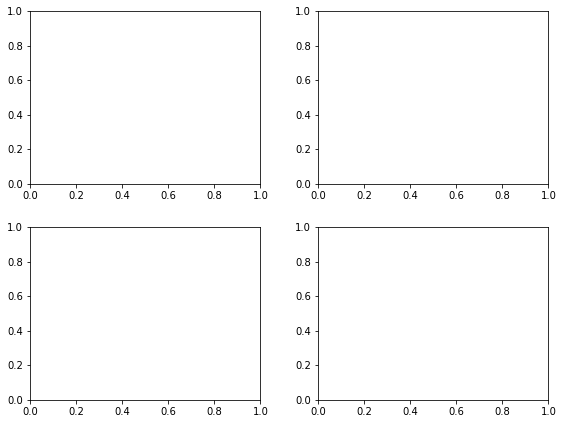

In [41]:
# 1. figure 객체를 생성한다.
fig = plt.figure(figsize=(8,6))

# 2. figure 객체의 add_axes 메소드로 위치와 크기를 지정하여 axes 객체를 생성한다.
# (가로위치, 세로위치, 가로크기, 세로크기)
ax1= fig.add_axes([0,0.5,0.4,0.4])
ax2= fig.add_axes([0.5,0.5,0.4,0.4])
ax3= fig.add_axes([0,0,0.4,0.4])
ax4= fig.add_axes([0.5,0,0.4,0.4])
# ax5 = fig.add_axes([0.37,0.38,0.15,0.15])



Text(0.5, 1.0, 'ax4')

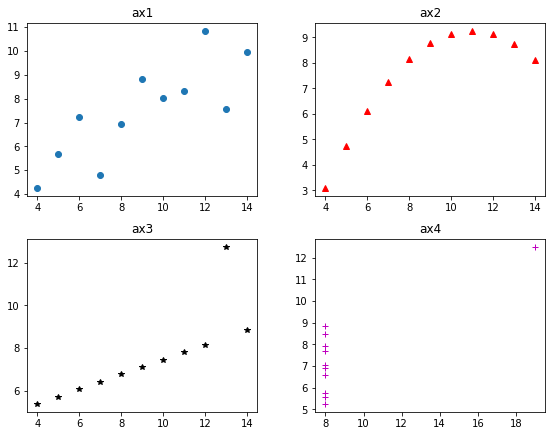

In [17]:
# 1. figure 객체를 생성한다.
fig = plt.figure(figsize=(8,6))

# 2. figure 객체의 add_axes 메소드로 위치와 크기를 지정하여 axes 객체를 생성한다.
# (가로위치, 세로위치, 가로크기, 세로크기)
ax1= fig.add_axes([0,0.5,0.4,0.4])
ax2= fig.add_axes([0.5,0.5,0.4,0.4])
ax3= fig.add_axes([0,0,0.4,0.4])
ax4= fig.add_axes([0.5,0,0.4,0.4])

# 3. axes에 그래프를 그린다.
ax1.plot(df1['x'],df1['y'],'o')
ax2.plot(df2['x'],df2['y'],'r^')
ax3.plot(df3['x'],df3['y'],'k*')
ax4.plot(df4['x'],df4['y'],'m+')

# 4.axes에 제목 추가.
ax1.set_title('ax1')
ax2.set_title('ax2')
ax3.set_title('ax3')
ax4.set_title('ax4')

# axes를 행, 열로 쪼개서 서브플롯 그리기
* plt.subplots() 함수를 호출하면 figure, axes 객체를 생성하여 튜플 형태로 반환한다.
> fig, ax = plt.subplots()

    1. axes 객체를 행, 열로 쪼개어 생성하기
    > fig, ax = plt.subplot(nrows=행개수, ncols=열개수, figsize=(가로,세로))
    2. axes[행번호][열번호] 형태로 접근해서 그래프 그리기
    3. 서브플롯 간 축을 공유할 수 있다.
    > sharex=True, sharey=True

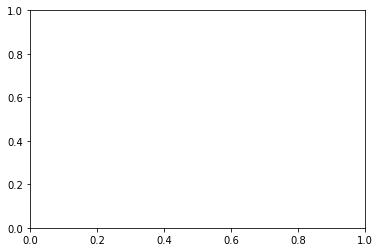

In [21]:
# 1. axes 객체를 행, 열로 쪼개어 생성하기
fig ,ax = plt.subplots()

# 하나의 커다란 캔버스에 하나의 그래프 창이 생성

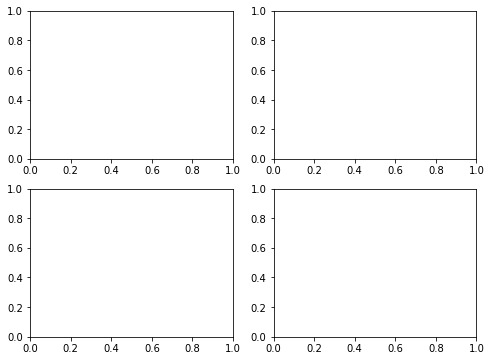

In [25]:
# 1. axes 객체를 행, 열로 쪼개어 생성하기
fig ,ax = plt.subplots(nrows=2,ncols=2, figsize=(8,6))

# 가로2 세로2로 쪼개준다.

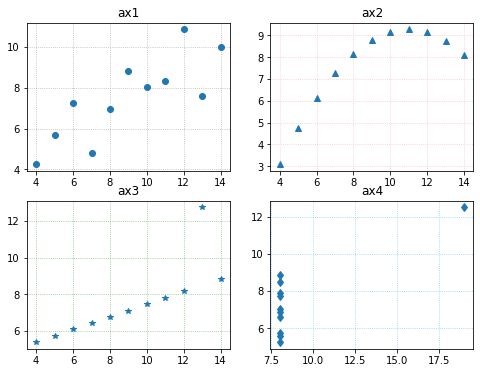

In [43]:
# 1. axes 객체를 행, 열로 쪼개어 생성하기
fig ,ax = plt.subplots(nrows=2,ncols=2, figsize=(8,6))

# 2. axes[행번호][열번호] 형태로 접근해서 그래프 그리기
ax[0][0].plot(df1['x'],df1['y'],'o')
ax[0][1].plot(df2['x'],df2['y'],'^')
ax[1][0].plot(df3['x'],df3['y'],'*')
ax[1][1].plot(df4['x'],df4['y'],'d')

# 3. 각 그래프에 제목 추가
ax[0][0].set_title('ax1')
ax[0][1].set_title('ax2')
ax[1][0].set_title('ax3')
ax[1][1].set_title('ax4')

# 4. 각 그래프에 그리드 추가
ax[0][0].grid(ls=':')
ax[0][1].grid(ls=':',color='pink')
ax[1][0].grid(ls=':',color='g',alpha=0.5)
ax[1][1].grid(ls=':', color='skyblue')


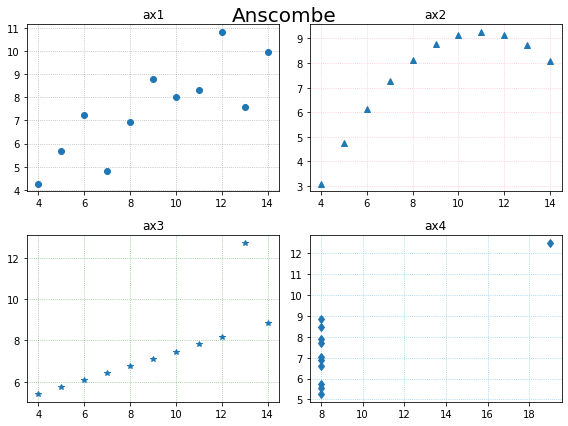

In [34]:
# 1. axes 객체를 행, 열로 쪼개어 생성하기
fig ,ax = plt.subplots(nrows=2,ncols=2, figsize=(8,6))

# 2. axes[행번호][열번호] 형태로 접근해서 그래프 그리기
ax[0][0].plot(df1['x'],df1['y'],'o')
ax[0][1].plot(df2['x'],df2['y'],'^')
ax[1][0].plot(df3['x'],df3['y'],'*')
ax[1][1].plot(df4['x'],df4['y'],'d')

# 3. 각 그래프에 제목 추가
ax[0][0].set_title('ax1')
ax[0][1].set_title('ax2')
ax[1][0].set_title('ax3')
ax[1][1].set_title('ax4')

# 4. 각 그래프에 그리드 추가
ax[0][0].grid(ls=':')
ax[0][1].grid(ls=':',color='pink')
ax[1][0].grid(ls=':',color='g',alpha=0.5)
ax[1][1].grid(ls=':', color='skyblue')

# 5. 그래프 전체 제목
fig.suptitle('Anscombe',fontsize=20)

# 6. 그래프 간격, 크기 최적화
fig.tight_layout()

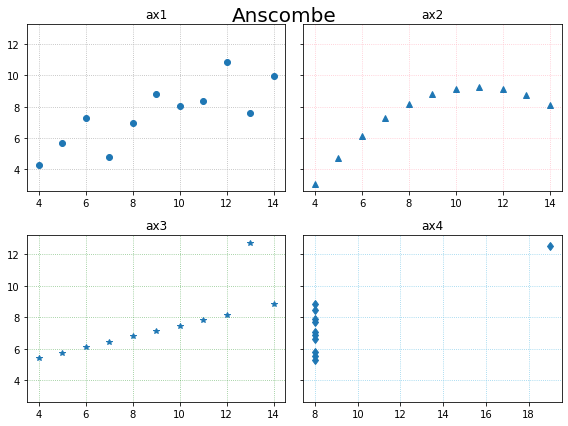

In [38]:
# 1. axes 객체를 행, 열로 쪼개어 생성하기
# 축 공유하기
fig ,ax = plt.subplots(nrows=2,ncols=2, figsize=(8,6), sharey=True)

# 2. axes[행번호][열번호] 형태로 접근해서 그래프 그리기
ax[0][0].plot(df1['x'],df1['y'],'o')
ax[0][1].plot(df2['x'],df2['y'],'^')
ax[1][0].plot(df3['x'],df3['y'],'*')
ax[1][1].plot(df4['x'],df4['y'],'d')

# 3. 각 그래프에 제목 추가
ax[0][0].set_title('ax1')
ax[0][1].set_title('ax2')
ax[1][0].set_title('ax3')
ax[1][1].set_title('ax4')

# 4. 각 그래프에 그리드 추가
ax[0][0].grid(ls=':')
ax[0][1].grid(ls=':',color='pink')
ax[1][0].grid(ls=':',color='g',alpha=0.5)
ax[1][1].grid(ls=':', color='skyblue')

# 5. 그래프 전체 제목
fig.suptitle('Anscombe',fontsize=20)

# 6. 그래프 간격, 크기 최적화
fig.tight_layout()
